validate/study dSA quality get clustered into leptonJets.

In [1]:
from coffea import hist
import coffea.processor as processor
import numpy as np
import matplotlib.pyplot as plt
import awkward

np.seterr(divide='ignore', invalid='ignore', over='ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import json

dataset4mu_ = json.load(open('../Samples/signal_4mu.json'))
dataset2mu2e_ = json.load(open('../Samples/signal_2mu2e.json'))

In [6]:
class dsaInLjProcessor(processor.ProcessorABC):
    def __init__(self):
        dataset_axis = hist.Cat('dataset', 'dataset')
        numDTCham_axis = hist.Bin('ndtcha', '# DT chambers', 6, 0, 6)
        numRPCHits_axis = hist.Bin('nrpchits', '# valid RPC hits', 8, 0, 8)
        numCSCHits_axis = hist.Bin('ncschits', '# valid CSC hits', 25, 0, 25)
        dtTOFnDOF_axis = hist.Bin('dttofndof', 'DT TOF nDOF', 25, 0, 25)
        dtTOFError_axis = hist.Bin('dttoferr', 'DT TOF error', 30, 0, 3)
        dtTOF_axis = hist.Bin('dttof', 'DT TOF', 30, -15, 15)
        rpcTOF_axis = hist.Bin('rpctof', 'RPC TOF', 20, -5, 5)
        hemisphere_axis = hist.Bin('hemi', 'hemisphere', 2, -2, 2)
        self._accumulator = processor.dict_accumulator({
            'ndtcha': hist.Hist("Counts", dataset_axis, numDTCham_axis),
            'nrpchits': hist.Hist("Counts", dataset_axis, numRPCHits_axis),
            'ncschits': hist.Hist("Counts", dataset_axis, numCSCHits_axis),
            'dttofndof': hist.Hist("Counts", dataset_axis, dtTOFnDOF_axis),
            'dttoferr': hist.Hist("Counts", dataset_axis, dtTOFError_axis),
            'dttof': hist.Hist("Counts", dataset_axis, dtTOF_axis),
            'rpctof': hist.Hist("Counts", dataset_axis, rpcTOF_axis),
            'hemi': hist.Hist("Counts", dataset_axis, hemisphere_axis)
        })
        
    @property
    def accumulator(self):
        return self._accumulator
    
    def process(self, df):
        output = self.accumulator.identity()
        dataset = df['dataset']
        
        numDTCham = awkward.fromiter(df['ljmisc_dsaNumValidDTChambers'])
        numRPCHits = awkward.fromiter(df['ljmisc_dsaNumValidRPCHits'])
        numCSCHits = awkward.fromiter(df['ljmisc_dsaNumValidCSCHits'])
        dtTOFnDOF = awkward.fromiter(df['ljmisc_dsaDTTOFnDOF'])
        dtTOFError = awkward.fromiter(df['ljmisc_dsaDTTOFError'])
        dtTOF = awkward.fromiter(df['ljmisc_dsaDTTOF'])
        rpcTOF = awkward.fromiter(df['ljmisc_dsaRPCTOF'])
        hemisphere = awkward.fromiter(df['ljmisc_dsaHemisphere'])
        
        output['ndtcha'].fill(dataset=dataset, ndtcha=numDTCham.flatten().flatten())
        output['nrpchits'].fill(dataset=dataset, nrpchits=numRPCHits.flatten().flatten())
        output['ncschits'].fill(dataset=dataset, ncschits=numCSCHits.flatten().flatten())
        output['dttofndof'].fill(dataset=dataset, dttofndof=dtTOFnDOF.flatten().flatten())
        output['dttoferr'].fill(dataset=dataset, dttoferr=dtTOFError.flatten().flatten())
        output['dttof'].fill(dataset=dataset, dttof=dtTOF.flatten().flatten())
        output['rpctof'].fill(dataset=dataset, rpctof=rpcTOF.flatten().flatten())
        output['hemi'].fill(dataset=dataset, hemi=hemisphere.flatten().flatten())
        
        return output
    
    def postprocess(self, accumulator):
        return accumulator

- lxy: 0.3cm

In [7]:
dataset={
    '4mu/mXX-100_mA-5_lxy-0p3': dataset4mu_['mXX-100_mA-5_lxy-0p3'],
    '4mu/mXX-1000_mA-0p25_lxy-0p3': dataset4mu_['mXX-1000_mA-0p25_lxy-0p3'],
    '2mu2e/mXX-100_mA-5_lxy-0p3': dataset2mu2e_['mXX-100_mA-5_lxy-0p3'],
    '2mu2e/mXX-1000_mA-0p25_lxy-0p3': dataset2mu2e_['mXX-1000_mA-0p25_lxy-0p3'],
}

output = processor.run_uproot_job(dataset,
                                  treename='ffNtuplizer/ffNtuple',
                                  processor_instance=dsaInLjProcessor(),
                                  executor=processor.futures_executor,
                                  executor_args=dict(workers=12, flatten=True),
                                  chunksize=500000,
                                 )

Processing: 100%|██████████| 20/20 [00:05<00:00,  3.98items/s]


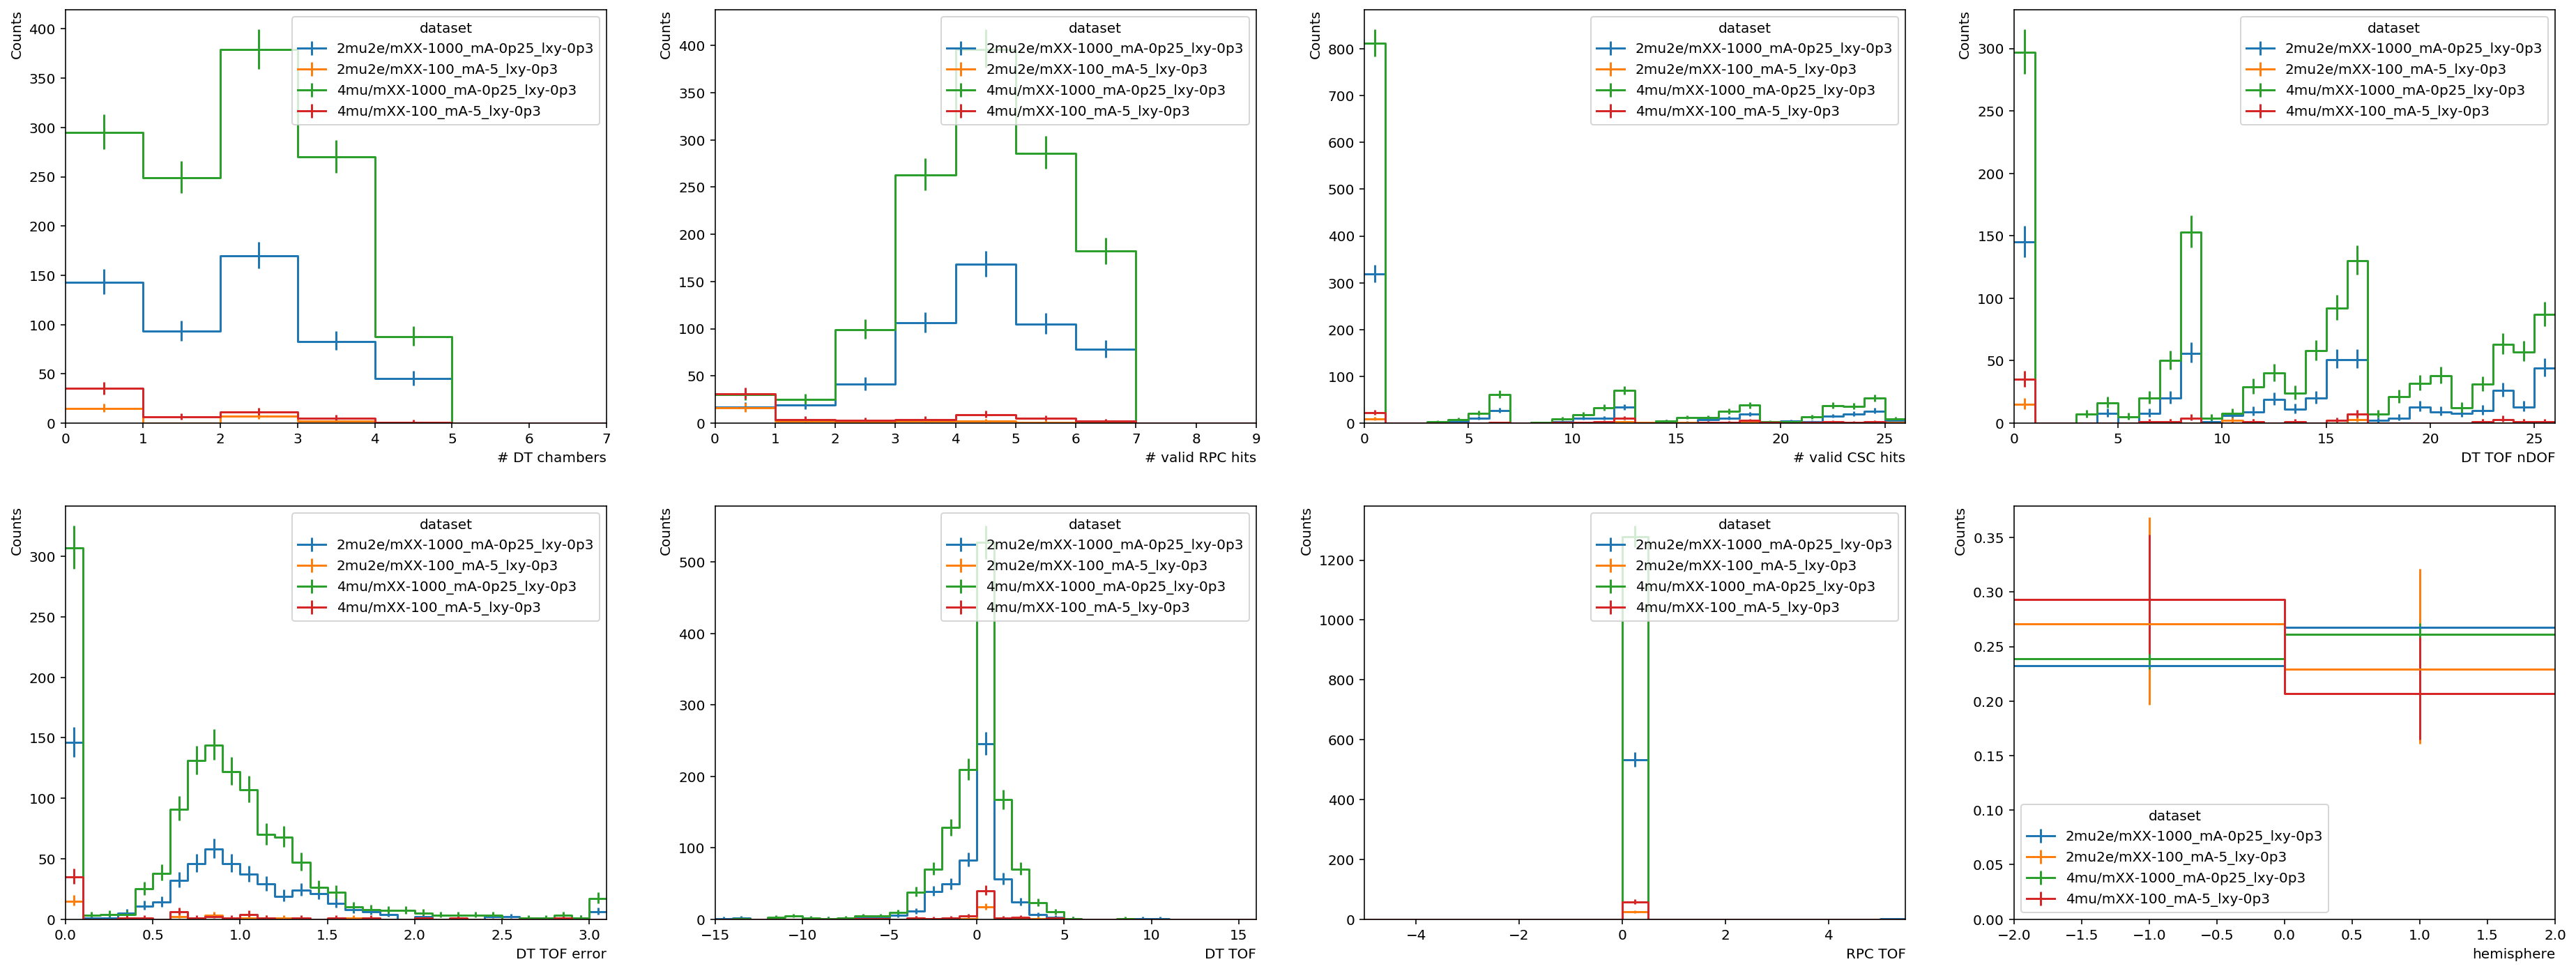

In [9]:
fig, axes = plt.subplots(2,4, figsize=(32, 12))
hist.plot1d(output['ndtcha'], overlay='dataset', ax=axes[0][0], overflow='over', density=False)
hist.plot1d(output['nrpchits'], overlay='dataset', ax=axes[0][1], overflow='over', density=False)
hist.plot1d(output['ncschits'], overlay='dataset', ax=axes[0][2], overflow='over', density=False)
hist.plot1d(output['dttofndof'], overlay='dataset', ax=axes[0][3], overflow='over', density=False)

hist.plot1d(output['dttoferr'], overlay='dataset', ax=axes[1][0], overflow='over', density=False)
hist.plot1d(output['dttof'], overlay='dataset', ax=axes[1][1], overflow='over', density=False)
hist.plot1d(output['rpctof'], overlay='dataset', ax=axes[1][2], overflow='over', density=False)
hist.plot1d(output['hemi'], overlay='dataset', ax=axes[1][3], density=True)

for ax in axes.flat:
    ax.set_xlabel(ax.get_xlabel(), x=1.0, ha="right")
    ax.set_ylabel(ax.get_ylabel(), y=1.0, ha="right")

- lxy: 300cm

In [10]:
dataset={
    '4mu/mXX-100_mA-5_lxy-300': dataset4mu_['mXX-100_mA-5_lxy-300'],
    '4mu/mXX-1000_mA-0p25_lxy-300': dataset4mu_['mXX-1000_mA-0p25_lxy-300'],
    '2mu2e/mXX-100_mA-5_lxy-300':dataset2mu2e_['mXX-100_mA-5_lxy-300'],
    '2mu2e/mXX-1000_mA-0p25_lxy-300': dataset2mu2e_['mXX-1000_mA-0p25_lxy-300'],
}

output = processor.run_uproot_job(dataset,
                                  treename='ffNtuplizer/ffNtuple',
                                  processor_instance=dsaInLjProcessor(),
                                  executor=processor.futures_executor,
                                  executor_args=dict(workers=12, flatten=True),
                                  chunksize=500000,
                                 )

Processing: 100%|██████████| 20/20 [00:05<00:00,  3.99items/s]


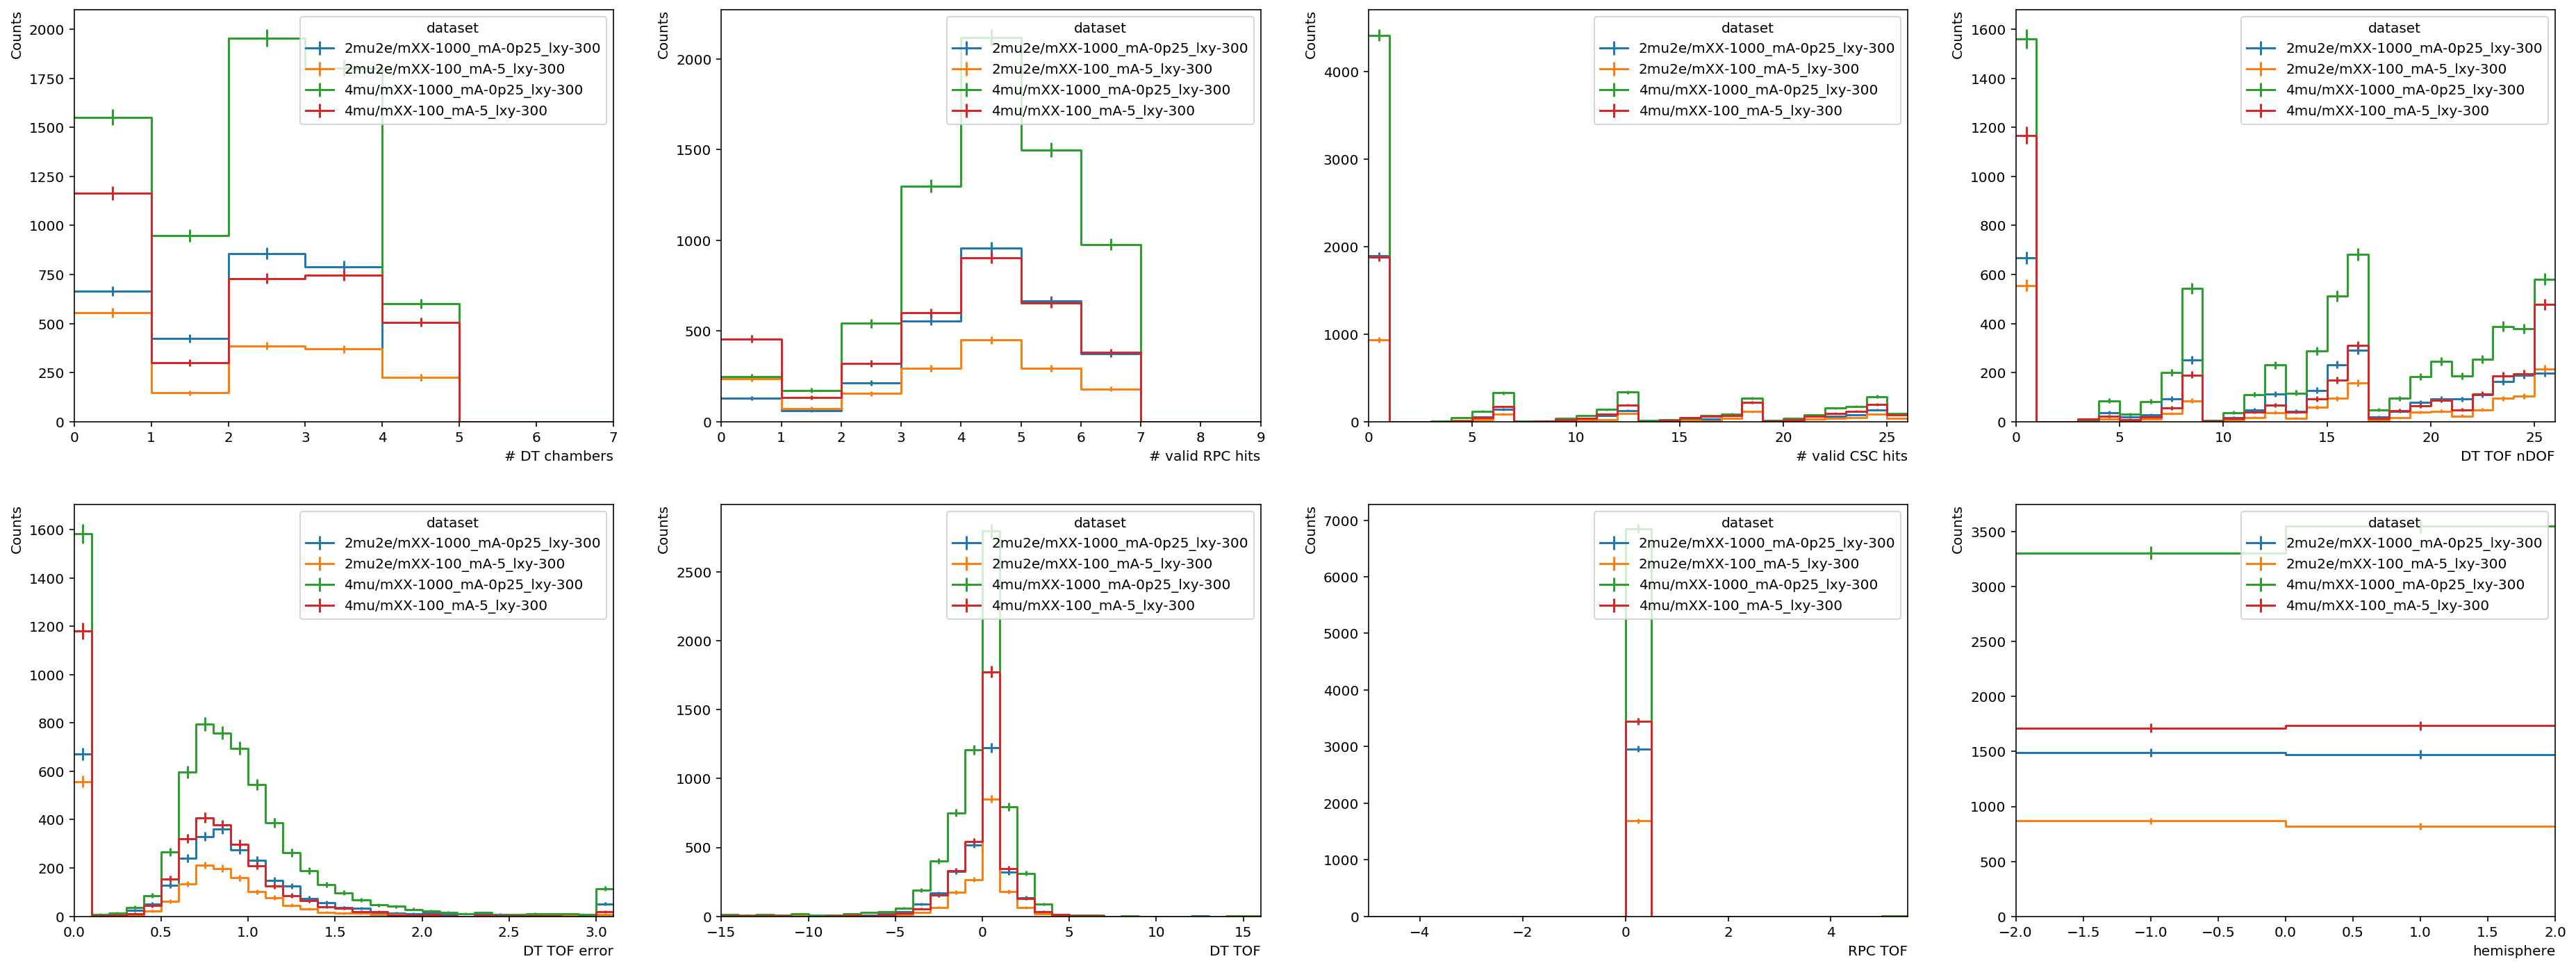

In [11]:
fig, axes = plt.subplots(2,4, figsize=(32, 12))
hist.plot1d(output['ndtcha'], overlay='dataset', ax=axes[0][0], overflow='over');
hist.plot1d(output['nrpchits'], overlay='dataset', ax=axes[0][1], overflow='over');
hist.plot1d(output['ncschits'], overlay='dataset', ax=axes[0][2], overflow='over');
hist.plot1d(output['dttofndof'], overlay='dataset', ax=axes[0][3], overflow='over');

hist.plot1d(output['dttoferr'], overlay='dataset', ax=axes[1][0], overflow='over');
hist.plot1d(output['dttof'], overlay='dataset', ax=axes[1][1], overflow='over');
hist.plot1d(output['rpctof'], overlay='dataset', ax=axes[1][2], overflow='over');
hist.plot1d(output['hemi'], overlay='dataset', ax=axes[1][3], )

for ax in axes.flat:
    ax.set_xlabel(ax.get_xlabel(), x=1.0, ha="right")
    ax.set_ylabel(ax.get_ylabel(), y=1.0, ha="right")